# Продажа домов в округе Кинг

За данную практическую работу необходимо с помощью регрессии предсказать цену продажи дома в округе Кинг. 

## Импорт и предварительная обработка данных 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df = df.drop(columns=["id", "zipcode"], axis=1)

In [7]:
df["date"] = pd.to_datetime(df["date"].str.strip(), format="%Y/%m/%d")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  lat            2161

## Feature Engenering

Сделаем конструирование дополнительных признаков. Разобьем дату на отдельные столбцы "День" "Месяц" "Год"

In [9]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [11]:
df = df.drop(columns=["date"])

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18


## Visualization

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Корреляционная карта

<AxesSubplot:>

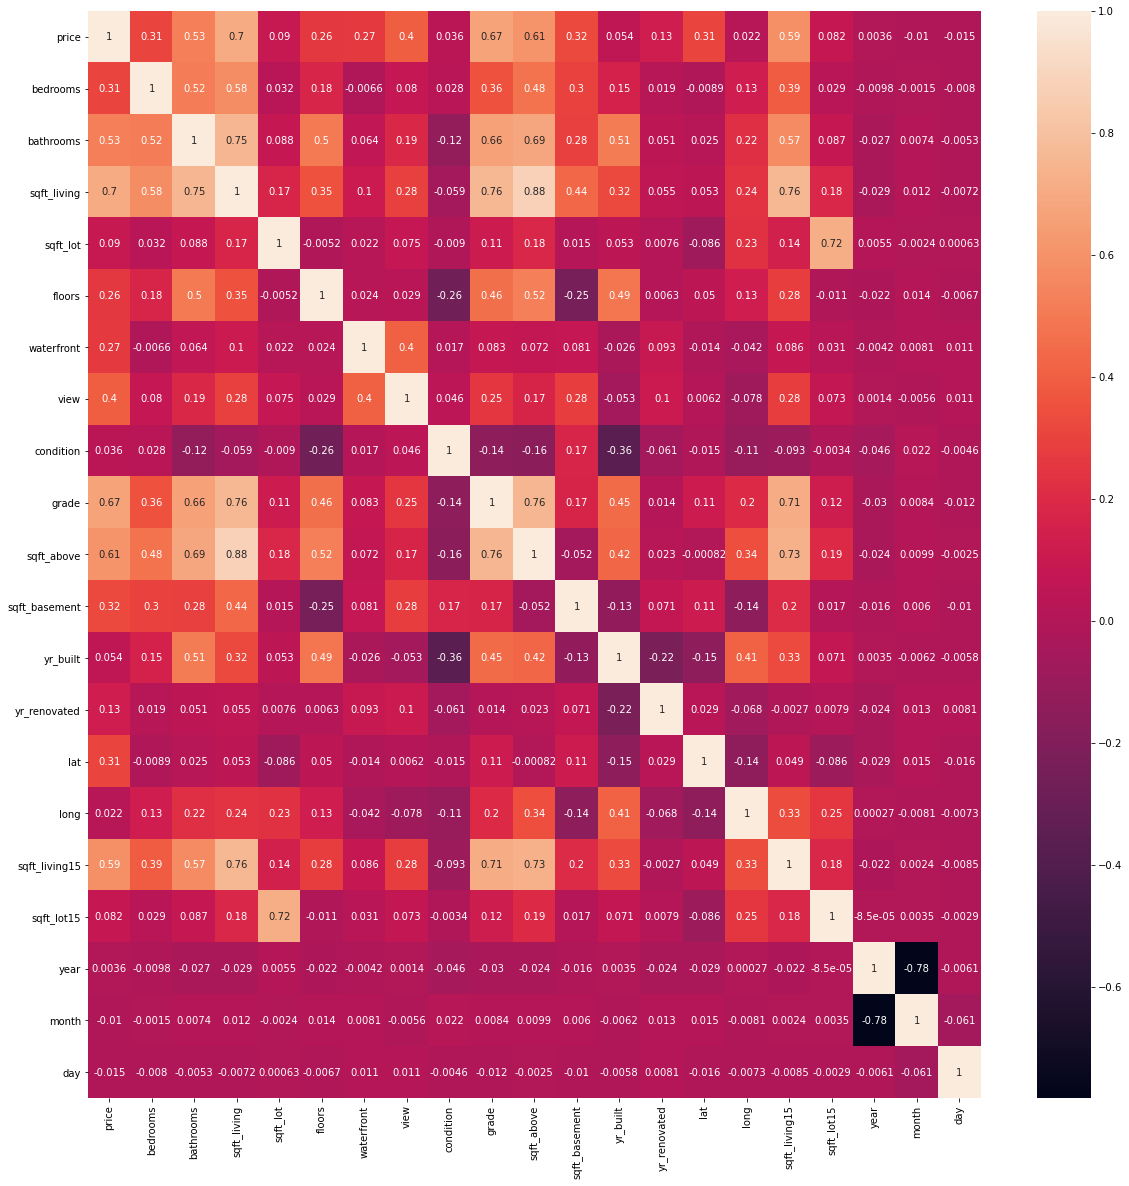

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

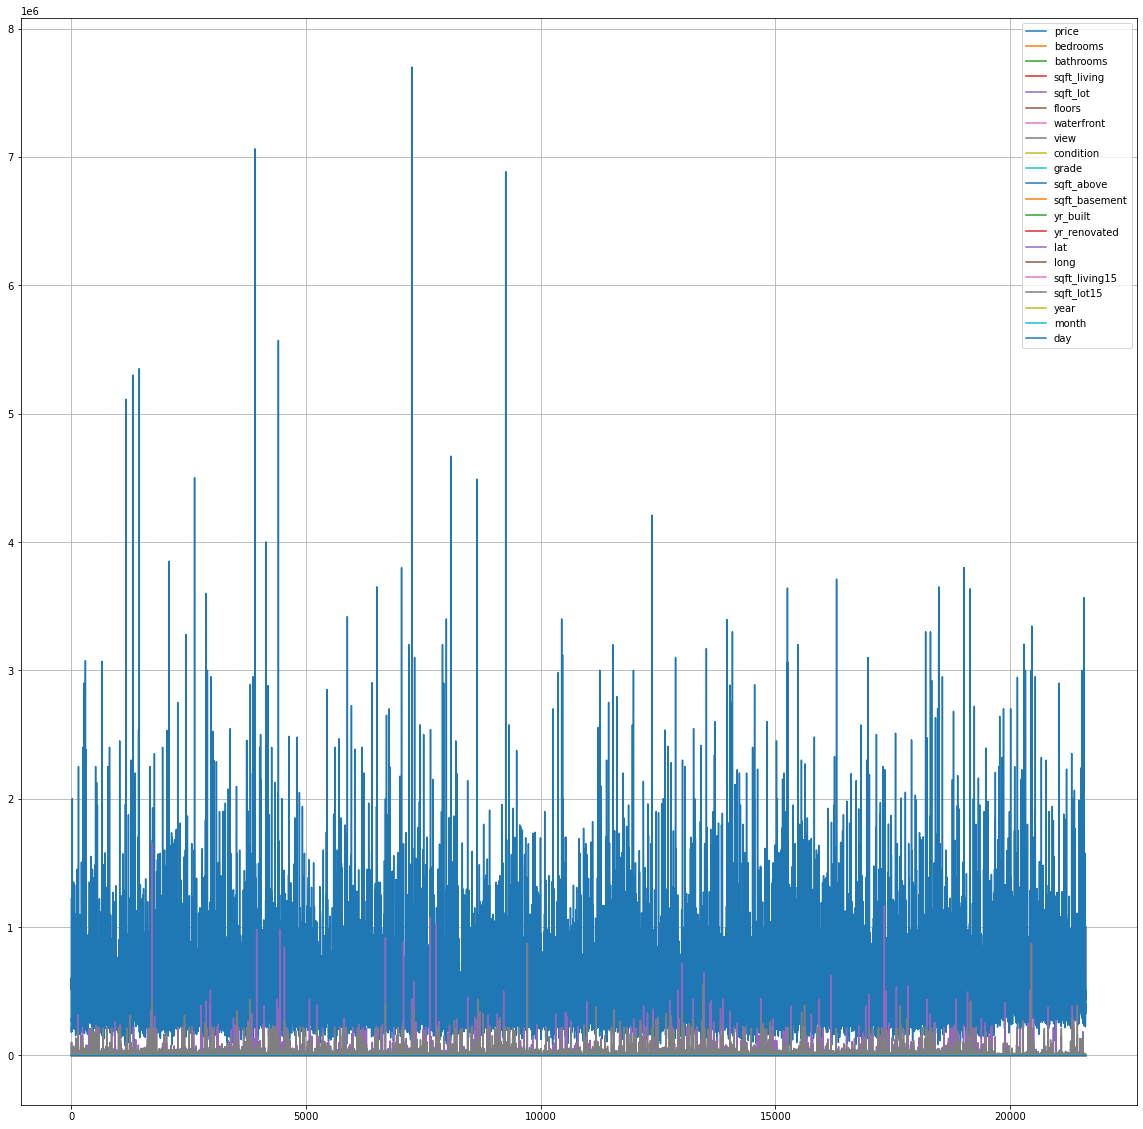

In [20]:
df.plot(figsize=(20, 20), grid="on")

<AxesSubplot:>

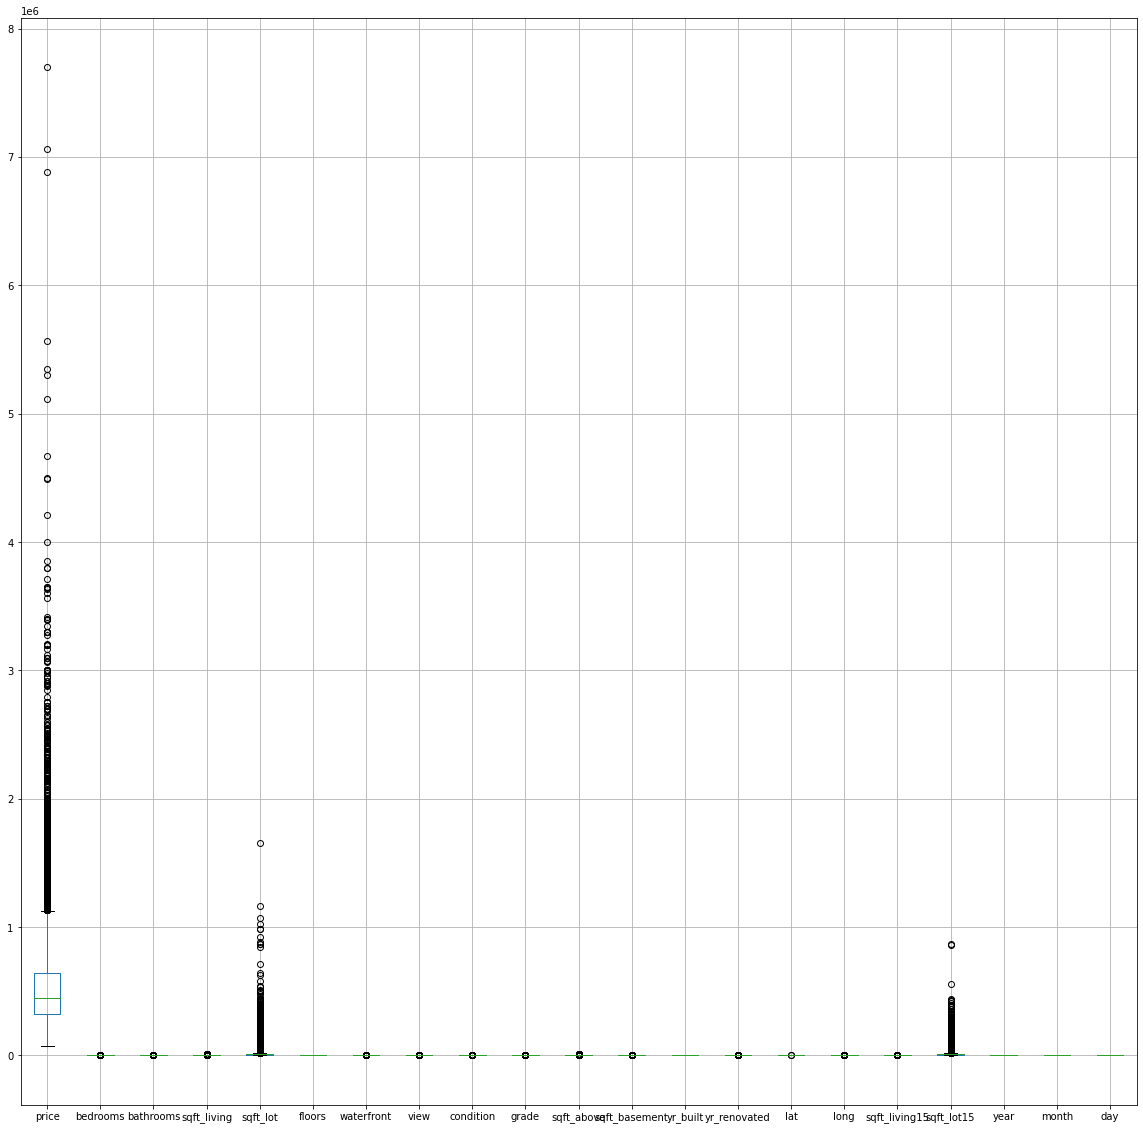

In [21]:
df.boxplot(figsize=(20, 20), grid="on")

In [24]:
import warnings
warnings.filterwarnings("ignore")

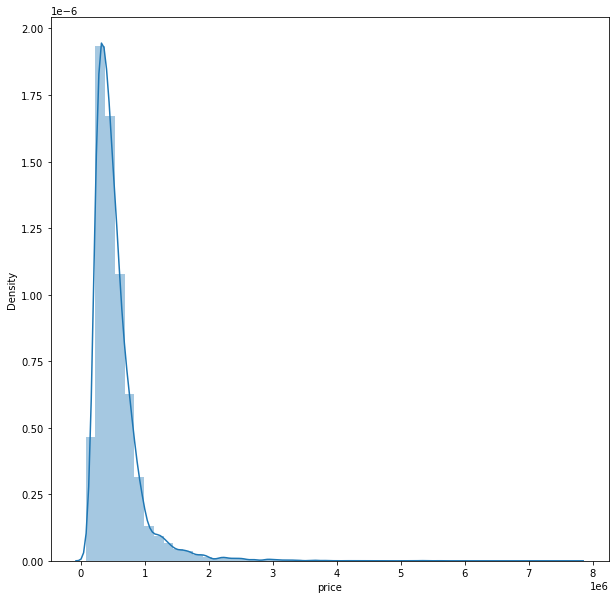

In [28]:
plt.figure(figsize = (10, 10))
sns.distplot(df.price)
plt.show()

##   Разбиение на тестовую и обучающую выборку

In [32]:
x = df.drop("price", axis=1)
y= df["price"].values

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

## Импорт методов для обучения

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Градиентный бустинг

In [36]:
grb = GradientBoostingRegressor(n_estimators=500).fit(x_train, y_train)

In [37]:
grb.score(x_test, y_test)

0.9002689298011004

## Линейная регрессия

In [38]:
lr = LinearRegression().fit(x_train, y_train)
lr.score(x_test, y_test)

0.7211858311928737

## Дерево решений

In [43]:
dt = DecisionTreeRegressor(max_depth=12).fit(x_train, y_train)
dt.score(x_test, y_test)

0.7853451570932901

# Заключение 
В ходе данной практической работы была произведена работа с данными. Данные были предобработаны визуализированны, а так же было обучено три модели машинного обучения на регресиию:
- Градиентный Бустинг - 0.90
- Линейная регрессия - 0.72
- Дерево решений - 0.78

В данном случае лучше всего себя показала модель Градиентного бустинга с результатом 0.90